# Who is ready to learn? (Our Machines Are!)

Our task at hand -- building an AI that can save lives.

Today we are going to work to create an AI that can predict whether a breast cancer tumor is benign or malignant. This diagnosis has incredibly important medical implications for those who are diagnosed with breast cancer. 

Before we get started, you should make sure you know what the difference between benign and malignant tumors are and discuss them with your team.

**Hint:** we recommend you heavily refer to your EDA mini project from last week for this activity! 

### Step 1: Imports and Preprocessing

We need to `import pandas as pd` and read in our data. It is currently a .csv (comma-separated value) file, and we generally use the pd.read_csv() function from pandas to read our data into a dataframe.

In [172]:
import pandas as pd
import numpy as np

In [173]:
breast_cancer = pd.read_csv("https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv")

In [174]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**TODO:** Do you remember how to print the first five rows of a pandas dataframe? How about all of the columns? How about the number of rows? Please do that below and google anything you are unsure about. 



In [175]:
breast_cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [176]:
# print columns of breast_cancer
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [177]:
# print the number of rows in breast_cancer
len(breast_cancer)

569

In [178]:
# explore anything else you are interested in here


**TODO:** Can you figure out how many rows are malignant (M) and how many are benign (B)? 

In [179]:
breast_cancer['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

### Step 2: Do Your Research

That is a ton of columns. That is a ton of data! Where do we start? 

You should probably do some research on this dataset to find out what the columns mean. I got it on kaggle - you can read about it here: [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).



In [180]:
radius_mean - mean of distances from center to points on the perimeter

texture_mean - standard deviation of gray-scale values

smoothness_mean - mean of local variation in radius lengths

fractal_dimension_worst - standard error for "coastline approximation" - 1

SyntaxError: invalid syntax (3075985152.py, line 1)

### Step 3: Cleaning our data up!

Maybe there are some columns we don't need. The last column makes zero sense right? Do we need an id column for our purposes? You should drop **any** columns that you feel are not worth keeping track of. 

Pandas' `drop()` documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html. Remember to use `inplace = True` if you are changing your dataframe and note creating a new one!

**Note:** This data is pretty clean! We only need a few lines for this dataset.

In [181]:
cols = ['Unnamed: 32', 'id']
breast_cancer.drop(cols, axis = 1, inplace = True)
breast_cancer.head()




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [182]:
breast_cancer.dropna(inplace = True)
breast_cancer.reset_index(drop=True, inplace=True)
breast_cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [183]:
# print the last five rows of your dataframe 
breast_cancer[["compactness_worst","concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]].head()


,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.2050,0.4000,0.1625,0.2364,0.07678


**TODO:** at this point, all of our data should be numeric except for our diagnosis column. This is because supervised machine learning models work off of numerical data. Use breast_cancer.info() below to check that all our data besides 'diagnosis' are numeric.



In [184]:
# Run breast_cancer.info()

breast_cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Dummy Variables - Preprocessing
Our target variable (the variable we are trying to predict) is `diagnosis`. Our only problem is that the diagnosis variable will either be an 'M' or a 'B', which is not something our model will understand. We need to change our M's to 1's and B's to 0's so that our model can think like computers do -- using numbers!  

To do so, we use something called a dummy variable. I'll show you how to do so below. 

In [185]:
dummies = pd.get_dummies(breast_cancer["diagnosis"])
dummies.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


**Ok, we've got our dummy variables. What now?** Now we have to pick one and add it to our dataframe -- we also have to delete the old diagnosis column!

In [186]:
breast_cancer["outcome"] = dummies["M"]
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


**TODO:** Now that our outcome column is there, we need to remove the diagnosis column that had the bad data, right? Please do so below.


In [187]:
#Drop the 'diagnosis' column from your dataframe. Remember to use inplace if you are changing the dataframe itself!
cols = ['diagnosis']
breast_cancer.drop(cols, axis = 1, inplace = True)
breast_cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Visualize our data

Now that we've cleaned our data and it is all ready for our model, we should understand some of the relationships. Use your learnings from last week to create two plots -- you can always start with simple [scatter plots](https://plotly.com/python/line-and-scatter/) or maybe a [scatterplot matrix](https://plotly.com/python/splom/). Get creative!



In [188]:
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
corr = breast_cancer.corr()
fig = px.imshow(corr, aspect="auto", color_continuous_scale='bupu', text_auto = True)
fig.show()



In [190]:
corr_data = breast_cancer.head()
fig = px.bar(corr_data, x='index', y=0, title="Correlation between Features and Having Breast Cancer")
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'outcome'] but received: index
 To use the index, pass it in directly as `df.index`.

In [191]:
fig = px.pie(breast_cancer, values ='outcome')
fig.show()

### Are you ready to perform machine learning? 

Do you think deciding whether a tumor is benign or malignant is classification or regression? Talk with your team for a minute.

Either way, we need to tell our code what our target variable is, and what our input is going to be. <br> **TODO:** Can you do so below?



In [211]:
# Create a variable named target and set it equal to the ["outcome"] column in our breast_cancer dataframe.
target = breast_cancer["outcome"]
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: outcome, Length: 569, dtype: uint8


In [226]:
# Create a variable named input_columns and set it equal to breast_cancer.loc[:, breast_cancer.columns != "outcome"]. This means our inputs are every single column except for column!

input_columns = breast_cancer.loc[:, breast_cancer.columns != "outcome"]
print(input_columns)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

### Splitting the Data

For every single supervised machine learning problem, we will follow the same flow with `sklearn`:

> *Split, Fit, Predict, and Evaluate.*

What is first? Splitting our data into training and testing sets. You can watch a video on why we do that [in the first 36 seconds of this video](https://www.youtube.com/watch?v=_vdMKioCXqQ). 

We will split our data using the [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function on `sklearn` using the same flow as this tutorial: https://realpython.com/train-test-split-python-data/#application-of-train_test_split. The code to do so is below. 

In [228]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)


In [229]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


**TODO:** can you look at the shape of the x_train, x_test, y_train, and y_test columns? Why does the shape of these columns make sense? 

In [230]:
#hint: start with x_train.shape
x_train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
87,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,0.05629,...,24.560,30.41,152.90,1623.0,0.1249,0.3206,0.5755,0.19560,0.3956,0.09288
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.800,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.19640,0.3245,0.11980
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.890,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242


In [231]:
x_test.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.1565,0.07530,0.2636,0.07676
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.2866,0.11200,0.2282,0.06954
218,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.3617,0.18200,0.3070,0.08255
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,13.80,20.14,87.64,589.5,0.13740,0.15750,0.1514,0.06876,0.2460,0.07262
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.10760,0.06791,0.0000,0.00000,0.2710,0.06164


In [232]:
 y_train.head()

87     1
8      1
400    1
151    0
554    0
Name: outcome, dtype: uint8

In [233]:
y_test.head

<bound method NDFrame.head of 298    0
514    1
218    1
401    0
174    0
      ..
435    1
536    1
446    1
303    0
122    1
Name: outcome, Length: 114, dtype: uint8>

**TODO:** Can you print the outputs with print(y_train) and print(y_test)? What do these 1's and 0's represent?

In [234]:
#print outputs


### We have split, now we gotta fit!
Now that are data is preprocessed (all numerical), and split (80/20 train/test) for machine learning, we can create a model to **classify** whether a patient has malignant (1) or benign (0) breast cancer!

The first model is a classification model called K Nearest Neighbors. You can watch a video on how K Nearest Neighbors works here: https://www.youtube.com/watch?v=0p0o5cmgLdE.

First things first, we need to import our model using SKLearn. You can follow the [guide]( https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) here to see how this tutorial works.


In [235]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN

**Creating the model object:**  we need to create an instance of the model. This is like having a model and giving it a nickname so we can remember it, change it, and save it to work custom on our dataset. 

In [236]:
# Creating the KNN model object -- we need to tell it the number of neighbors to look at.
k = 7 #number of neighbors to look at (look at 7 nearest neighbors)
my_KNN_model = KNN(n_neighbors=k)

And there you have it. We have a K Nearest Neighbors model that will look at the 7 nearest neighbors, and gave it a nice nickname, my_KNN_model. <br> <br>

**Fitting (Training) the model object:** **Supervised machine learning** training involves learning from past results (`y_train`) and past inputs (`x_train`). We pass these to our model for learning to teach our model to answer the question "*based on these inputs, what outputs can we expect?*"
<br>

To do this, we want to let this model learn from our data. We do so by running our model object's `.fit()` function on our training data.

In [237]:
my_KNN_model.fit(x_train, y_train) #train the model on our past results x_train (inputs) and y_train (outputs)

KNeighborsClassifier(n_neighbors=7)

**Prediction and Evaluation:** How do we know if our model is actually good? We need to **test** our model by giving it a two-step quiz. 

Step 1: We let our model use our testing inputs (`x_test`) to make predictions that guess the whether the patient has benign or malignant tumors (we call these predictions `y_hat`). In this case our `y_hat`'s are a bunch of 1's and 0's that represent whether our model thinks the patient's tumor is benign or malignant. 

We do this by running our model object's `.predict()` function.

In [238]:
#make some predictions based on your testing inputs (x_test) using the predict() function
y_hat = my_KNN_model.predict(x_test)

In [239]:
y_hat #these are our predictions for our x_test inputs. 

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1], dtype=uint8)

In [240]:
np.array(y_test) #these are what actually happened for our x_test inputs. Do you see some differences?

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1], dtype=uint8)

Step 2 - Evaluation: Here we want to compare `y_hat` to `y_test`. Discuss with your team about why we should do this. 

One we we can compare them is visual inspection. With that said, would you recommend going through by hand and making a tally for every time the one's and zero's don't match up?

Please don't do this. Please save yourself this nasty headache when we can just do math. Below is a common way to do this, called mean squared error. 

To get mean squared error, we compute the difference between each element in `y_hat` and `y_test` and square it and then get the average of all of that to see how far off we are.

In [241]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.07017543859649122


**Not too bad!** MSE represents  the average error (difference) between our model and the correct result. A low mean squared error means that our model makes the correct guess most of the time. 

But we have to think about the nature of the problem. As Data Scientists, do we want to tell someone that we have this average error when we are predicting something as serious as breast cancer? 

And what does an error mean? Are we telling them they don't have a malignant tumor (y_hat=0) when they actually do (y_test = 1)? Are we telling them they have a tumor (y_hat=1) when they actually don't (y_test = 0)?

We can get insights on this through a confusion matrix. 

<AxesSubplot:>

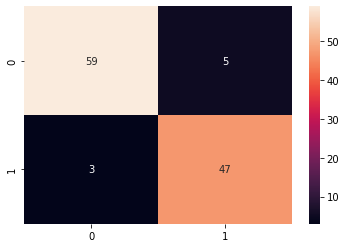

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

**What is this???** I encourage you and your team to read about it here: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62. You should define what true positives, true negatives, false positives, and false negatives represent for this scenario. 

Discuss what other  findings you can take away, and talk with your instructor about metrics like accuracy, precision and recall!

**The last step!!** We need to change parameters and data to improve our model as we go. If we can make even 1 more correct cancer prediction, it is worth it, right? 

**TODO:** Go back and change the value of `k` in the **creating your model object** section and re-run all the code below it. See what changes with your MSE and confusion matrix!

### Code Your Own Machine Learning Model

It's time for us to create our own classifier. Let's go with an [SVM](https://www.youtube.com/watch?v=_YPScrckx28). We will do the first step for you.

I know it was a lot of information in the last section, but the code is *basically* the same. Since our data is already split, you will follow the same steps to fit your model, make some predictions, evaluate the performance, and visualize your confusion matrix.



In [253]:
model = KNN()



#Create your model object -- you can go back and change the kernel argument after evaluating your data.

NameError: name 'SVC' is not defined

Do you remember how to fit a model? What parts of our data do we fit/train on? You can go look at the section above for inspiration.

In [0]:
#fit your model


Now create some predictions and set them equal to `y_hat`. You can look above or google how to make predictions on sklearn if you get confused!

In [0]:
#create some predictions on your testing inputs and set them equal to y_hat.


Compute your MSE below. Is this higher or lower than KNN? Which one would you recommend so far?

In [0]:
#Compute your MSE.


Now, create a confusion matrix! How are the results? Do we end up with more false negatives or false positives?

In [0]:
#Create a confusion matrix


Amazing, now try changing your kernel and seeing how your results change. You can research what kernels are available here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. If your interested in more ML with SKLearn you should get used to pages like these!

### Want more?

There are dozens of models available on SKLearn: https://scikit-learn.org/stable/supervised_learning.html.

You can try an implement your own below, I recommend starting with logistic regression or random forests :) 

In [0]:
#have fun!